In [343]:
### ニューロンモデルに再急勾配方で ####
## ニューロンの練習
import numpy as np

class Neuron:
    
    def __init__(self, n):
        self.w = np.random.rand(n)  # setされた次元数
        self.b = 1   # バイアスがランダムや小数点になるだけで収束率がかなり違う
        self.y = None 
        self.s = None
        self.r = 0.01
        self.output_list = []
        self.output_y_max = []
        self.output_y_avg = []
        self.output_y_min = []
        self.output_count = 0
        
    def correct(self, np_x):
        """受け取ったnp_x配列からt値をランダムに生成する(t値は条件下で作る)"""
        return 0 if (np_x[np_x== 0.0].size) else 1
    
    def learn(self, x, t):
        """
        学習させる
        x : 入力値
        t : 正解データ
        """
        self.s = (x.dot(self.w))+1*self.b
        self.y = 1 / (1 + np.exp(-self.s))
#             self.y = self.activate(self.set_state(x, self.w, self.b))  # ここで先に計算しておかないと[1.,1.]に限り収束しない
        self.w -= self.r*(self.y - t)*self.y*(1-self.y)*x  # パラメータが更新 
        self.b -= self.r*(self.y - t)*self.y*(1-self.y)    # バイアスが更新
        
        diff = np.sqrt(np.power(self.y - t, 2))
        return diff  # 誤差を返す


if __name__ == '__main__':
    neuron_num = 2  # 2次元に設定
    n = Neuron(neuron_num) 
    for i in range(100000):
        np_x = np.array(np.round(np.random.rand(neuron_num)))  # ランダムに入力値を設定
        t = n.correct(np_x)  # 入力値にあった正解データ取得
        diff = n.learn(np_x, t)  # 入力値と正解データで学習させ、誤差を取得
        
        n.output_list.append(diff)  # 取得した誤差をリストにまとめる
        
        if i % 50 == 0:  # 50回ごと
            n.output_y_max.append(max(n.output_list))  # 最大値
            n.output_y_avg.append(sum(n.output_list) / len(n.output_list))  # 平均値
            n.output_y_min.append(min(n.output_list))  # 最小値
            n.output_list = []  # 初期化
            n.output_count += 1
    print("終了", n.output_count)

終了 2000


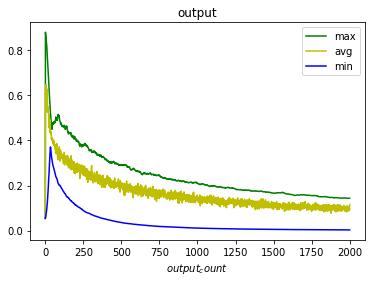

In [347]:
# グラフ
%matplotlib inline
from matplotlib import pyplot as plt
# x = np.linspace(0, 100000, 100000)
# plt.plot(x, error_list, 'b-')
x_max = np.linspace(0,n.output_count,n.output_count)
x_avg = np.linspace(0,n.output_count,n.output_count)
x_min = np.linspace(0,n.output_count,n.output_count)
output_max, = plt.plot(x_max, n.output_y_max, 'g-', label="max")
output_avg, = plt.plot(x_avg, n.output_y_avg, 'y-', label="avg")
output_min, = plt.plot(x_min, n.output_y_min, 'b-', label="min")
plt.legend(handles=[output_max, output_avg, output_min])
plt.title("output")
plt.xlabel('$output_count$')
plt.show()